In [1]:
#Assignment 3

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib
import urllib.request
# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [75]:
#importing the dataset
df = pd.read_csv('sample_orig_2000.txt', sep="|")
df.columns = df.columns.str.strip()
df.head()

,750,200205,N,203004,Unnamed: 4,000,1,P,49,21,...,WI,SF,53000,F100Q1000004,P.1,336,02,Other sellers,Other servicers,Unnamed: 25
0,698,200210,N,203003,15940.0,0,1,P,78,25,...,OH,SF,44700.0,F100Q1000012,C,330,2,Other sellers,Other servicers,NaN
1,708,200210,N,203003,33340.0,25,1,P,88,38,...,WI,SF,53000.0,F100Q1000016,P,330,2,Other sellers,Other servicers,NaN
2,813,200302,N,203004,15380.0,0,1,P,78,22,...,NY,SF,14200.0,F100Q1000024,P,327,2,Other sellers,Other servicers,NaN
3,734,200004,N,203003,36740.0,17,1,P,90,40,...,FL,SF,32700.0,F100Q1000033,P,360,1,Other sellers,CHASEMTGECO,NaN
4,756,200004,N,203003,30020.0,0,1,P,79,9,...,OK,SF,73500.0,F100Q1000066,P,360,2,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN


In [76]:
# Shape of the dataset
df.shape

(49999, 26)

In [77]:
df.columns = ["CREDIT SCORE","FIRST PAYMENT DATE","FIRST TIME HOMEBUYER FLAG","MATURITY DATE","METROPOLITAN STATISTICAL AREA",
               "MORTGAGE INSURANCE PERCENTAGE","NUMBER OF UNITS","OCCUPANCY STATUS","ORIGINAL COMBINED LOAN-TO-VALU","ORIGINAL DEBT-TO-INCOME (DTI) RATIO",
               "ORIGINAL UPB","ORIGINAL LOAN-TO-VALUE","ORIGINAL INTEREST RATE","CHANNE","PREPAYMENT PENALTY MORTGAGE FLAG",
               "PRODUCT TYPE","PROPERTY STATE","PROPERTY TYPE","POSTAL CODE","LOAN SEQUENCE NUMBER","LOAN PURPOSE",
               "ORIGINAL LOAN TERM","NUMBER OF BORROWERS","SELLER NAME","SERVICER NAME","SUPER CONFORMING FLAG"]
                #"Pre-HARP LOAN SEQUENCE NUMBER"]

In [78]:
df.head()

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,...,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN SEQUENCE NUMBER,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG
0,698,200210,N,203003,15940.0,0,1,P,78,25,...,OH,SF,44700.0,F100Q1000012,C,330,2,Other sellers,Other servicers,NaN
1,708,200210,N,203003,33340.0,25,1,P,88,38,...,WI,SF,53000.0,F100Q1000016,P,330,2,Other sellers,Other servicers,NaN
2,813,200302,N,203004,15380.0,0,1,P,78,22,...,NY,SF,14200.0,F100Q1000024,P,327,2,Other sellers,Other servicers,NaN
3,734,200004,N,203003,36740.0,17,1,P,90,40,...,FL,SF,32700.0,F100Q1000033,P,360,1,Other sellers,CHASEMTGECO,NaN
4,756,200004,N,203003,30020.0,0,1,P,79,9,...,OK,SF,73500.0,F100Q1000066,P,360,2,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN


In [79]:
df.describe()

,CREDIT SCORE,FIRST PAYMENT DATE,MATURITY DATE,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,ORIGINAL LOAN-TO-VALUE,ORIGINAL INTEREST RATE,POSTAL CODE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SUPER CONFORMING FLAG
count,49999.000000,49999.000000,49999.000000,42458.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49927.000000,49999.000000,49999.000000,0.0
mean,827.464309,200025.534691,203015.146043,30082.927646,9.551131,1.031641,78.225185,52.475750,130917.778356,77.734995,8.188809,52504.748933,359.786416,1.644253,NaN
std,1030.851167,38.624497,27.874119,11338.712374,31.906281,0.489988,17.263804,130.378934,58494.545423,16.552198,0.491801,28817.469350,1.936397,2.007921,NaN
min,300.000000,200002.000000,202510.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,9000.000000,6.000000,5.125000,600.000000,301.000000,1.000000,NaN
25%,674.000000,200006.000000,203005.000000,19124.000000,0.000000,1.000000,72.000000,28.000000,85000.000000,72.000000,7.875000,29800.000000,360.000000,1.000000,NaN
50%,719.000000,200009.000000,203008.000000,31180.000000,0.000000,1.000000,80.000000,35.000000,123000.000000,80.000000,8.250000,49400.000000,360.000000,2.000000,NaN
75%,758.000000,200012.000000,203011.000000,39580.000000,25.000000,1.000000,90.000000,43.000000,170000.000000,90.000000,8.500000,80000.000000,360.000000,2.000000,NaN
max,9999.000000,200710.000000,203709.000000,49740.000000,999.000000,99.000000,999.000000,999.000000,486000.000000,999.000000,10.875000,99900.000000,408.000000,99.000000,NaN


Based on the data description above, we found that the super conforming flag had no values at all. So we decided to drop the Super Conforming Flag

In [80]:
del df['SUPER CONFORMING FLAG']

In [81]:
df.shape

(49999, 25)

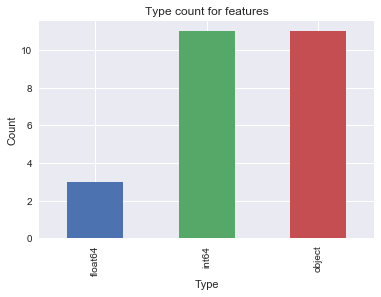

In [82]:
#What are the datatypes present in the dataset
plt.title('Type count for features')
plt.xlabel('Type')
plt.ylabel('Count')
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.show()

Most of the features in the dataset are either objects or integers with a few float values

In [83]:
#Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 25 columns):
CREDIT SCORE                           49999 non-null int64
FIRST PAYMENT DATE                     49999 non-null int64
FIRST TIME HOMEBUYER FLAG              49999 non-null object
MATURITY DATE                          49999 non-null int64
METROPOLITAN STATISTICAL AREA          42458 non-null float64
MORTGAGE INSURANCE PERCENTAGE          49999 non-null int64
NUMBER OF UNITS                        49999 non-null int64
OCCUPANCY STATUS                       49999 non-null object
ORIGINAL COMBINED LOAN-TO-VALU         49999 non-null int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO    49999 non-null int64
ORIGINAL UPB                           49999 non-null int64
ORIGINAL LOAN-TO-VALUE                 49999 non-null int64
ORIGINAL INTEREST RATE                 49999 non-null float64
CHANNE                                 49999 non-null object
PREPAYMENT PENALTY MORTGAGE FLAG       49763

Based on the dataset info above, most of the columns have their data, as such we wont be dealing with a lot of missing values

In [84]:
#Investigating missing values in the dataset
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,CREDIT SCORE,0
1,FIRST PAYMENT DATE,0
2,FIRST TIME HOMEBUYER FLAG,0
3,MATURITY DATE,0
4,METROPOLITAN STATISTICAL AREA,7541
5,MORTGAGE INSURANCE PERCENTAGE,0
6,NUMBER OF UNITS,0
7,OCCUPANCY STATUS,0
8,ORIGINAL COMBINED LOAN-TO-VALU,0
9,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,0


Only the METROPOLITAN STATISTICAL AREA, PREPAYMENT PENALTY MORTGAGE FLAG, POSTAL CODE are the only columns in the dataset that have missing values. We shall investigate and fill these columns

In [85]:
#This column doesn't seem to have any missing values
df['POSTAL CODE'].mode()

0    30000.0
dtype: float64

In [86]:
df['POSTAL CODE'].fillna('30000.0', inplace=True)

In [87]:
#Metropolitan statistical area, dealing with missing values
df['METROPOLITAN STATISTICAL AREA'].mode()

0    16974.0
dtype: float64

In [88]:
df['METROPOLITAN STATISTICAL AREA'].fillna('16974.0', inplace=True)

In [89]:
df['PREPAYMENT PENALTY MORTGAGE FLAG'].mode()

0    N
dtype: object

In [90]:
df['PREPAYMENT PENALTY MORTGAGE FLAG'].fillna('N', inplace=True)

All the missing values have been replaced

# Dealing with categorical values in the dataset

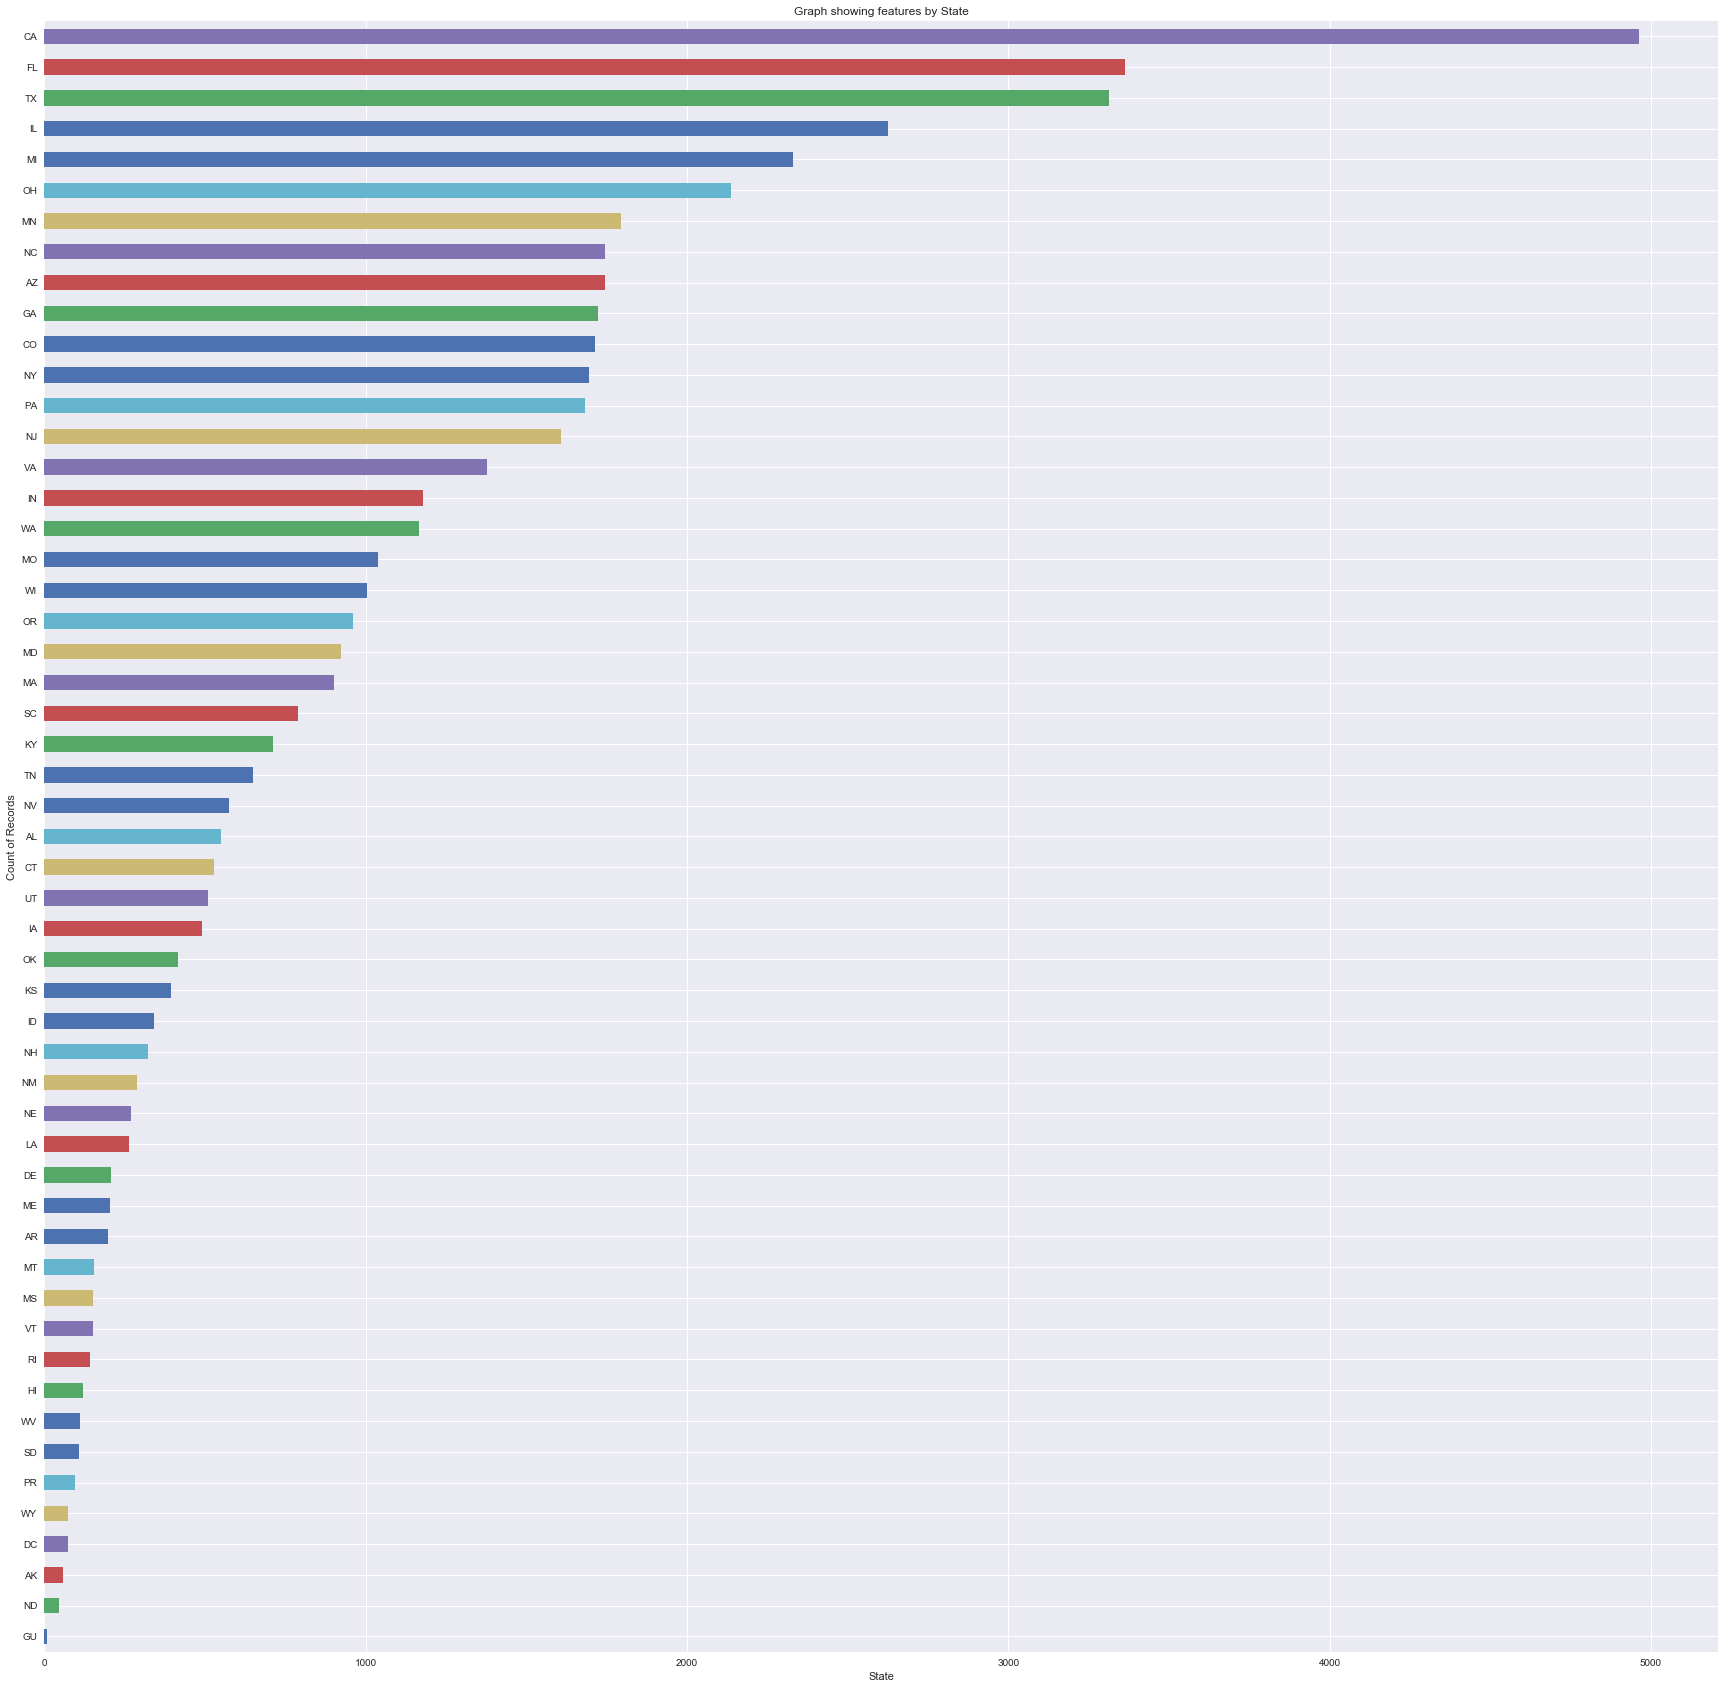

In [91]:
#What are the datatypes present in the dataset
plt.title('Graph showing features by State')
plt.xlabel('State')
plt.ylabel('Count of Records')
df['PROPERTY STATE'].value_counts().sort_values().plot(kind='barh', figsize=(30,30))
plt.show()

In [92]:
# What is the average credit score for all borrowers in the dataset
df['CREDIT SCORE'].describe()

count    49999.000000
mean       827.464309
std       1030.851167
min        300.000000
25%        674.000000
50%        719.000000
75%        758.000000
max       9999.000000
Name: CREDIT SCORE, dtype: float64

The median credit score in the sample dataset is 827 while the lowest credit score is 300

In [93]:
df['CREDIT SCORE'].replace(to_replace=9999, value=np.nan, inplace=True)
df['CREDIT SCORE'].fillna((df['CREDIT SCORE'].mean()), inplace=True)

In [94]:
categorical_columns = df.select_dtypes(include=['object']).columns

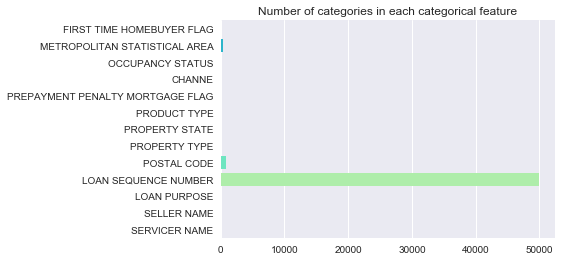

In [95]:
# Barplot
sns.barplot(y = categorical_columns, x = df[categorical_columns].apply(pd.Series.nunique, axis = 0).tolist(), palette=sns.color_palette("rainbow"))
plt.title('Number of categories in each categorical feature')
plt.show()

In [96]:
df['SELLER NAME'].value_counts()

WELLSFARGOHOMEMORTGA    10227
Other sellers            9749
ABNAMROMTGEGROUP,INC     5536
BANKOFAMERICA,NA         4931
NATLCITYMTGECO           3571
NORWESTMORTGAGE,INC      3232
CHASEMANHATTANMTGECO     1624
PRINCIPALRESIDENTIAL     1516
PNCMTGECORPOFAMERICA     1467
OLDKENTMTGECO            1340
COUNTRYWIDE              1315
FIRSTARBANK,NA           1204
BRANCHBANKING&TRUSTC      890
BISHOPSGATERESIDENTI      863
FLAGSTARBANK,FSB          835
CROSSLANDMTGECORP         731
FIRSTHORIZONHOMELOAN      645
FIFTHTHIRDBANK            323
Name: SELLER NAME, dtype: int64

Wells Fargo Bank is the biggest lender while FIFTHTHIRDBANK is the least common lender

In [97]:
df['PROPERTY TYPE'].value_counts()

SF    39052
PU     6531
CO     4090
MH      244
CP       74
99        8
Name: PROPERTY TYPE, dtype: int64

In [98]:
df['FIRST TIME HOMEBUYER FLAG'].value_counts()

N    33847
Y     8976
9     7176
Name: FIRST TIME HOMEBUYER FLAG, dtype: int64

Only 8976 people in the dataset are first time home buyers, thus generally most of the buyers in the sample dataset aren't first time home buyers

In [99]:
#df['MATURITY DATE'].hist()
df['Maturity_year'] =  [int(str(d)[:4]) for d in df['MATURITY DATE']]

In [100]:
df['Maturity_year'].value_counts()

2030    45657
2031     4281
2029       26
2032       16
2028        5
2027        5
2035        3
2026        2
2037        1
2034        1
2033        1
2025        1
Name: Maturity_year, dtype: int64

Most of the loans in the dataset will mature by the year 2030

In [101]:
df['NUMBER OF UNITS'].value_counts()

1     48873
2       890
4       124
3       111
99        1
Name: NUMBER OF UNITS, dtype: int64

90% of the properties in the dataset are one unit properties

In [102]:
df['OCCUPANCY STATUS'].value_counts()

P    45450
I     2484
S     2065
Name: OCCUPANCY STATUS, dtype: int64

Over 90% of the properties in the dataset are one unit properties

In [103]:
df['ORIGINAL UPB'].mean()

130917.7783555671

The original unpaid balance of loans in the dataset is at least $130,000

In [104]:
df['ORIGINAL INTEREST RATE'].describe()

count    49999.000000
mean         8.188809
std          0.491801
min          5.125000
25%          7.875000
50%          8.250000
75%          8.500000
max         10.875000
Name: ORIGINAL INTEREST RATE, dtype: float64

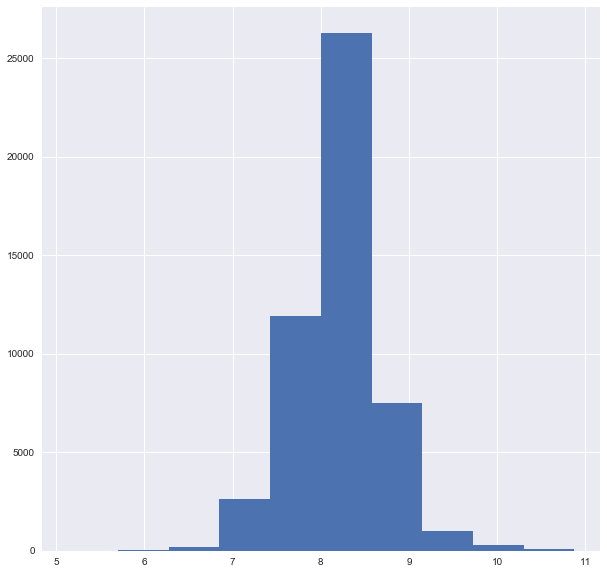

In [105]:
df['ORIGINAL INTEREST RATE'].hist(figsize=(10,10))

The minimum interest rate was 5.125% while the max interest rate was 10.875%. The median interest rate was 8.18%

In [106]:
df['PRODUCT TYPE'].value_counts()

FRM    49999
Name: PRODUCT TYPE, dtype: int64

All the properties in the dataset were fixed rate mortgages

In [107]:
Years_to_pay_off = (df['ORIGINAL LOAN TERM'].mode())/12

In [108]:
Years_to_pay_off

0    30.0
dtype: float64

count    49999.000000
mean       359.786416
std          1.936397
min        301.000000
25%        360.000000
50%        360.000000
75%        360.000000
max        408.000000
Name: ORIGINAL LOAN TERM, dtype: float64

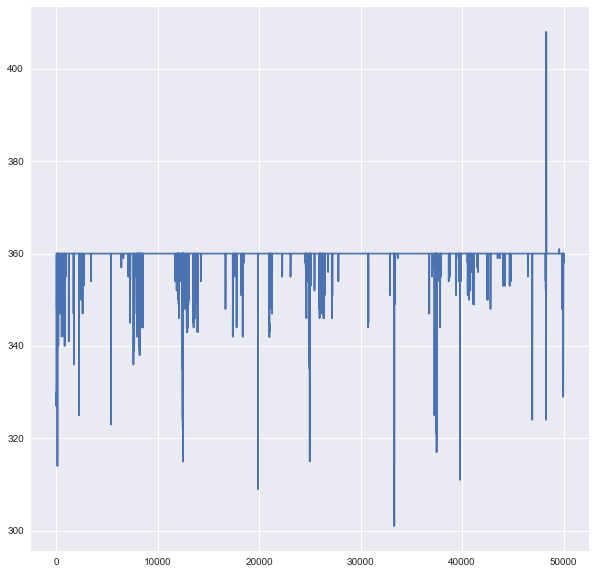

In [109]:
df['ORIGINAL LOAN TERM'].plot(figsize=(10,10))
df['ORIGINAL LOAN TERM'].describe()

Over 95% of the loans in the dataset have 30 year terms to pay off, the shortest loan term is about 25 years

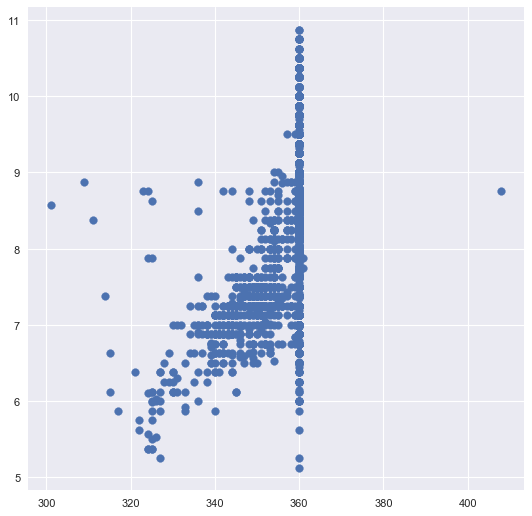

In [110]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter( df['ORIGINAL LOAN TERM'], df['ORIGINAL INTEREST RATE'])


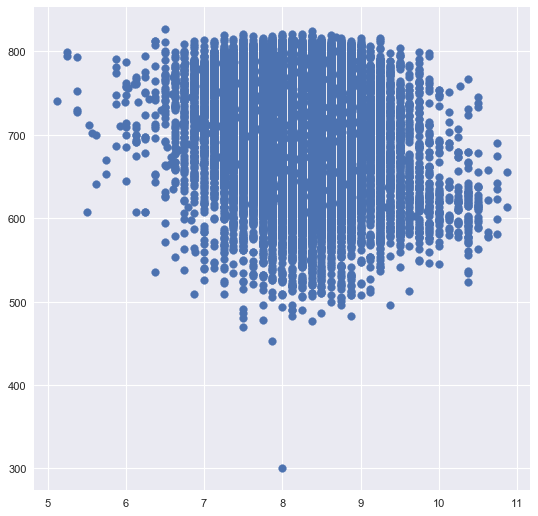

In [111]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter( df['ORIGINAL INTEREST RATE'],df['CREDIT SCORE'])

The credit scores did not have a bearing on the interest rate that an applicant would get

C:\ProgramData\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


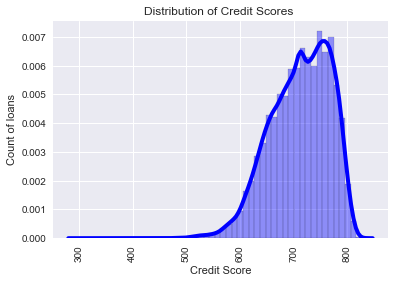

count    49999.000000
mean       711.930858
std         54.897801
min        300.000000
25%        674.000000
50%        717.000000
75%        756.000000
max        827.000000
Name: CREDIT SCORE, dtype: float64


In [112]:
#Credit score distribution
# Histogram and density chart
#plt.figure(figsize=(5, 5), dpi=80)
sns.distplot(df['CREDIT SCORE'], hist=True, kde=True, 
             bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Distribution of Credit Scores ')
plt.xlabel('Credit Score')
plt.ylabel('Count of loans')
plt.show()

print(df['CREDIT SCORE'].describe())

People with a credit score of at least 500 had the highest chances of getting approved to buy homes

C:\ProgramData\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


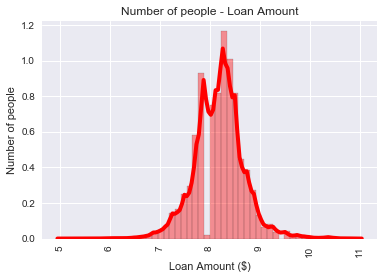

count    49999.000000
mean         8.188809
std          0.491801
min          5.125000
25%          7.875000
50%          8.250000
75%          8.500000
max         10.875000
Name: ORIGINAL INTEREST RATE, dtype: float64


In [113]:
# Histogram and density chart
sns.distplot(df['ORIGINAL INTEREST RATE'], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
#plt.ylabel('Number of people')
plt.show()

print(df['ORIGINAL INTEREST RATE'].describe())

In [120]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

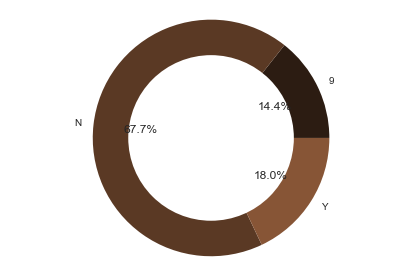

In [124]:
p_categories = df['FIRST TIME HOMEBUYER FLAG'].cat.categories.tolist()
# Circle chart
fig1, ax1 = plt.subplots()
ax1.pie(df['FIRST TIME HOMEBUYER FLAG'].value_counts().sort_index().tolist(),
        labels=p_categories,
        autopct='%1.1f%%',
        colors= sns.color_palette("copper"))

ax1.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
plt.tight_layout()
plt.show()